In [6]:
# ResNet50 - model's name
from keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
from keras.preprocessing import image
import numpy as np

import requests
from io import BytesIO
from PIL import Image

In [7]:
model = ResNet50(weights='imagenet')

In [8]:
# model's architecture
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

Total params: 25,636,712
Trainable params: 25,583,592
Non-trainable params: 53,120
__________________________________________________________________________________________________


![](https://images.unsplash.com/photo-1518791841217-8f162f1e1131?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=700&q=60)

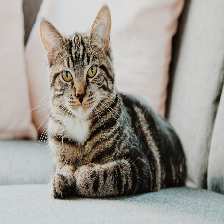

In [9]:
url_image = 'https://images.unsplash.com/photo-1518791841217-8f162f1e1131?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=700&q=60'

response = requests.get(url_image)
img = Image.open( BytesIO(response.content) )
img = img.resize((224,224))
img

In [10]:
X = image.img_to_array(img)
# because model is expecting array of images
X = np.expand_dims(X, axis=0)
X.shape

(1, 224, 224, 3)

In [11]:
y_pred = model.predict(X)

In [12]:
decode_predictions(y_pred, top=3)

[[('n02123045', 'tabby', 0.590948),
  ('n02123159', 'tiger_cat', 0.25992006),
  ('n02124075', 'Egyptian_cat', 0.074339695)]]